### Discretization or Binning : ( The process of transforming continuous variables into discrete variables by creating a set of continuous intervals that span the range of the variables values.)

####  Types of Binning : 
#### Unsupervised Binning ( Equal width Binning , Equal Binning , K-means Binning )
#### Supervised Binning  ( Decision Tree Binning )
#### Custom Binning 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [26]:
df = pd.read_csv('titanicdata2.csv',usecols=['Age','Fare','Survived'])

In [27]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [30]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
# Before Binning accuracy score

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6223776223776224

In [33]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6386932707355242

In [34]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [35]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [36]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [37]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [38]:
# After Binnin

clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [39]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6261345852895148

#### discretize function to apply any strategy

In [40]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before Age")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='green')
    plt.title("After Age")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before Fare")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='green')
    plt.title("After Fare")

    plt.show()
    

0.6330790297339594


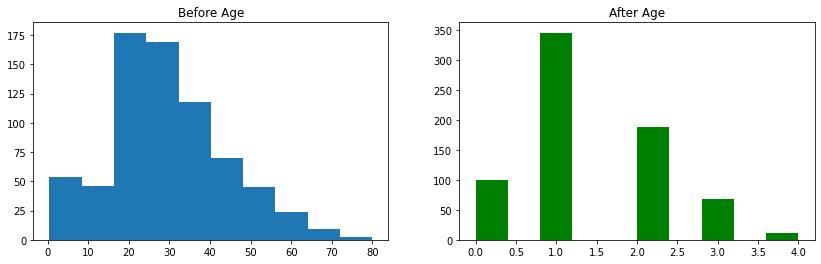

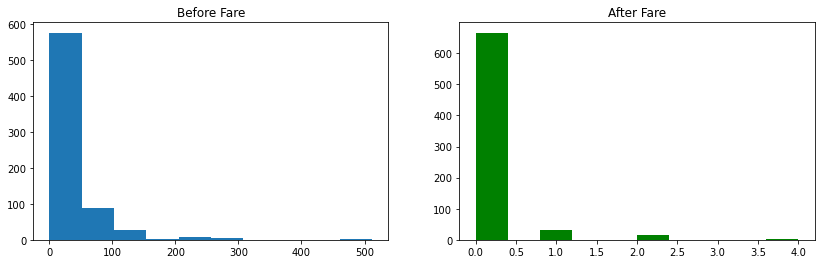

In [41]:
discretize(5,'uniform')  # Equal width Binning (All bins in each feature have identical widths.)

0.6359350547730829


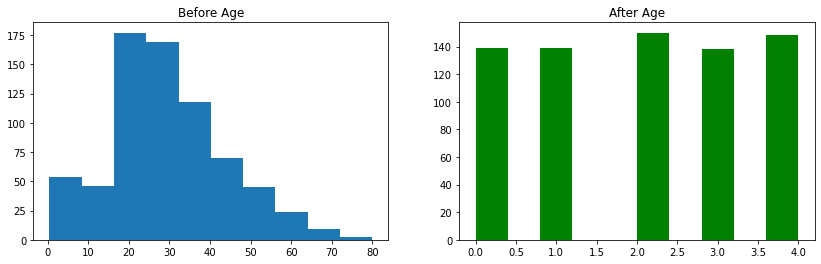

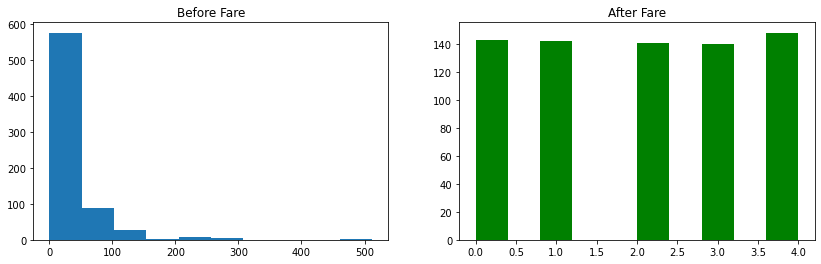

In [42]:
discretize(5,'quantile')  # Equal frequency (All bins in each feature have the same number of points.)

0.6232981220657277


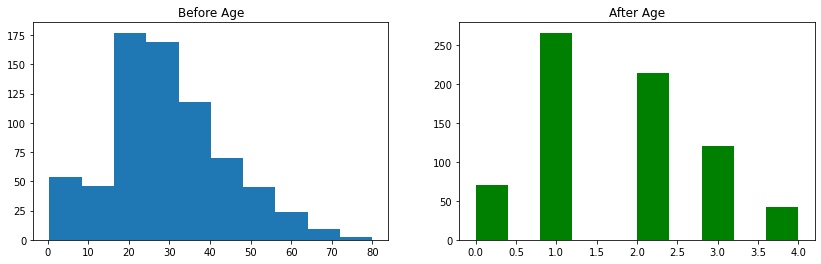

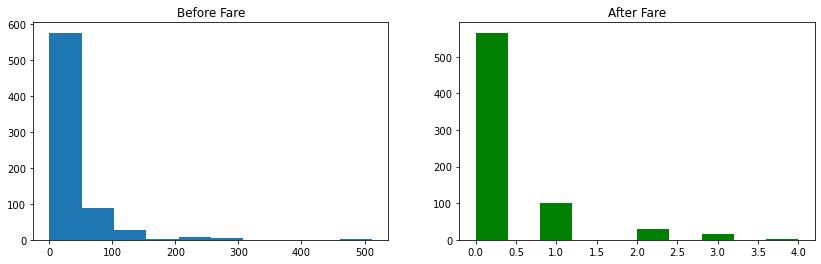

In [43]:
# Values in each bin have the same nearest center of a 1D k-means cluster.

discretize(5,'kmeans')